In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


# Project- NLP Email

### Business Objective:

##### Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favourtism and hate in the gender or culture, in today’s world so dominated by email no organization is immune to these hate emails.The goal of the project is to identify such emails in the given day based on the above inappropriate content.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings("ignore")

## Load the data

In [4]:
email=pd.read_csv("emails")
email

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


### Remove unwanted columns

In [5]:
email=email.drop("Unnamed: 0",axis=1)
email=email.drop("filename",axis=1)
email=email.drop("Message-ID",axis=1)

In [6]:
email

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


### EDA

In [7]:
email["Class"].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

#### Seperate abusive and non abusive and Remove the Duplicates

#### Abusive

In [8]:
abusive=email[email["Class"]=="Abusive"]
abusive

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
3405,There is a lot of confused bullshit floating a...,Abusive
3406,"wow, three weeks away from the kids ! brave an...",Abusive
3407,\ngot this from late friday. have you ever hea...,Abusive
3408,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive


#### Non-Abusive

In [9]:
nonabusive=email[email["Class"]=="Non Abusive"]
nonabusive

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [10]:
nonabusive[nonabusive.duplicated()]

,content,Class
4014,---------------------- Forwarded by Phillip K ...,Non Abusive
4015,---------------------- Forwarded by Phillip K ...,Non Abusive
4016,"Dave, \n\n Here are the names of the west desk...",Non Abusive
4017,"Paula,\n\n 35 million is fine\n\nPhillip",Non Abusive
4018,---------------------- Forwarded by Phillip K ...,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [11]:
nonabusive=nonabusive.drop_duplicates()
nonabusive

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


#### Concatenate both abuse and non abuse

In [12]:
email=pd.concat([abusive,nonabusive]).reset_index(drop=True)
email

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
26419,Do you need new leads for your business ?\n D...,Non Abusive
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
26421,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
26422,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [13]:
email["Class"].value_counts()

Non Abusive    23014
Abusive         3410
Name: Class, dtype: int64

#### Visualization using pie chart

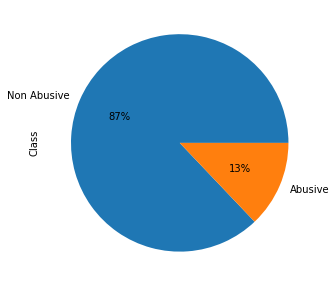

In [14]:
email['Class'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))
plt.show()

## Text Preprocessing

##### Remove puntuation ,lower case, remove symbols, remove words contain numbers

In [15]:
import re# Regular expression
import string

In [16]:
def clean_text(text):
    text=text.lower()
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[0-9' ']+',' ',text)
    text=re.sub('[''""...]',' ',text)
    text=re.sub('[\n]',' ',text)
    text=re.sub('[\s]',' ',text)
    return text

clean = lambda x: clean_text(x)

In [17]:
email["content"]=email["content"].apply(clean)
email["content"]

0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr           a...
                               ...                        
26419     do you need new leads for your business    do...
26420                garth brooks   wrapped up in you  ...
26421          dear smartreminders member             f...
26422                    kid rock   forever         off...
26423     you received this e mail because you register...
Name: content, Length: 26424, dtype: object

### STOP WORDS REMOVAL

In [18]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91854\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### word frequency before applying stopwords for top 20

In [19]:
freq_words=pd.Series(' '.join(email['content']).split()).value_counts()[:20]
freq_words

the       244859
to        180830
and       118908
a         109068
of         99291
in         77875
you        70100
for        69188
excelr     69167
i          68157
com        67959
on         57810
is         56023
s          53946
that       47227
this       44753
ect        41268
from       40770
be         38636
with       36816
dtype: int64

#### Removing stopwords 

In [20]:
stop_words=stopwords.words("english")+['excelr', 'ect', 'com', 'hou', 'cc', 'td', 'http', 'www', 'font', 'original', 'message','subject', 'fw']


email["content"]=email["content"].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
email["content"]

0        eat shit john j lavorato pm john arnold footba...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john j lavorato john arnold john cant ...
                               ...                        
26419    need new leads business need increased interne...
26420    garth brooks wrapped win tickets trip garth br...
26421    dear smartreminders member franchoice free one...
26422    kid rock forever official kid rock site kidroc...
26423    received e mail registered e trade web site on...
Name: content, Length: 26424, dtype: object

#### Word Frequency after removal of stopwords for top 20

In [21]:
freq_new_words=pd.Series(" ".join(email["content"]).split()).value_counts()[:20]
freq_new_words

please    17420
e         16668
pm        15467
time      14027
would     13405
b         13122
new       13017
sent      12033
one       12020
get       11318
size      10834
br        10652
mail      10355
may       10093
know      10074
week       9908
align      9780
type       9410
corp       9083
thanks     8876
dtype: int64

## Feature Extraction

### 1. Count Vectoriser

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv=CountVectorizer(min_df=1,max_df=5) # df=Data frequency
x=cv.fit_transform(email["content"])
word_df=pd.DataFrame({"Term":cv.get_feature_names(),"Occurrences":np.asarray(x.sum(axis=0)).ravel().tolist()})
word_df["Frequency"]=word_df["Occurrences"]/np.sum(word_df["Occurrences"])
word_df.head(20)

,Term,Occurrences,Frequency
0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
1,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
2,aaaaaaaaaaaaaaaaaaaaaaaaaaaaafhzwiaaaaaaaadzuq...,1,0.000007
3,aaaaaaaaaaaaaaaaaaaaahzpzxcaaaaaabok,1,0.000007
4,aaaaaaaaaaaawflaiaaaaaaaag,1,0.000007
5,aaaaaabwaad,4,0.000027
6,aaaaaewjvgbqaaaavx,1,0.000007
7,aaaabrtzwfz,1,0.000007
8,aaabbqebaqebaqaaaaaaaaadaaec,1,0.000007
9,aaagbagabbqa,1,0.000007


### TFIDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english",max_features=500,max_df=1,smooth_idf=True)
vec=tfidf.fit_transform(email["content"])
feature_names=tfidf.get_feature_names()
dense=vec.todense() # todense returns a matrix
denselist=dense.tolist()
td_df=pd.DataFrame(denselist,columns=feature_names)
td_df

,abramoff,acegas,actarray,activitated,advantium,aeb,aefa,afterholiem,aftertax,afudc,...,yfti,yil,yourman,youwintrivia,zeroue,zonealarm,zoomerang,zpro,zubeida,zzzipe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word cloud

In [25]:
from  wordcloud import WordCloud # wordcloud for entire corpus

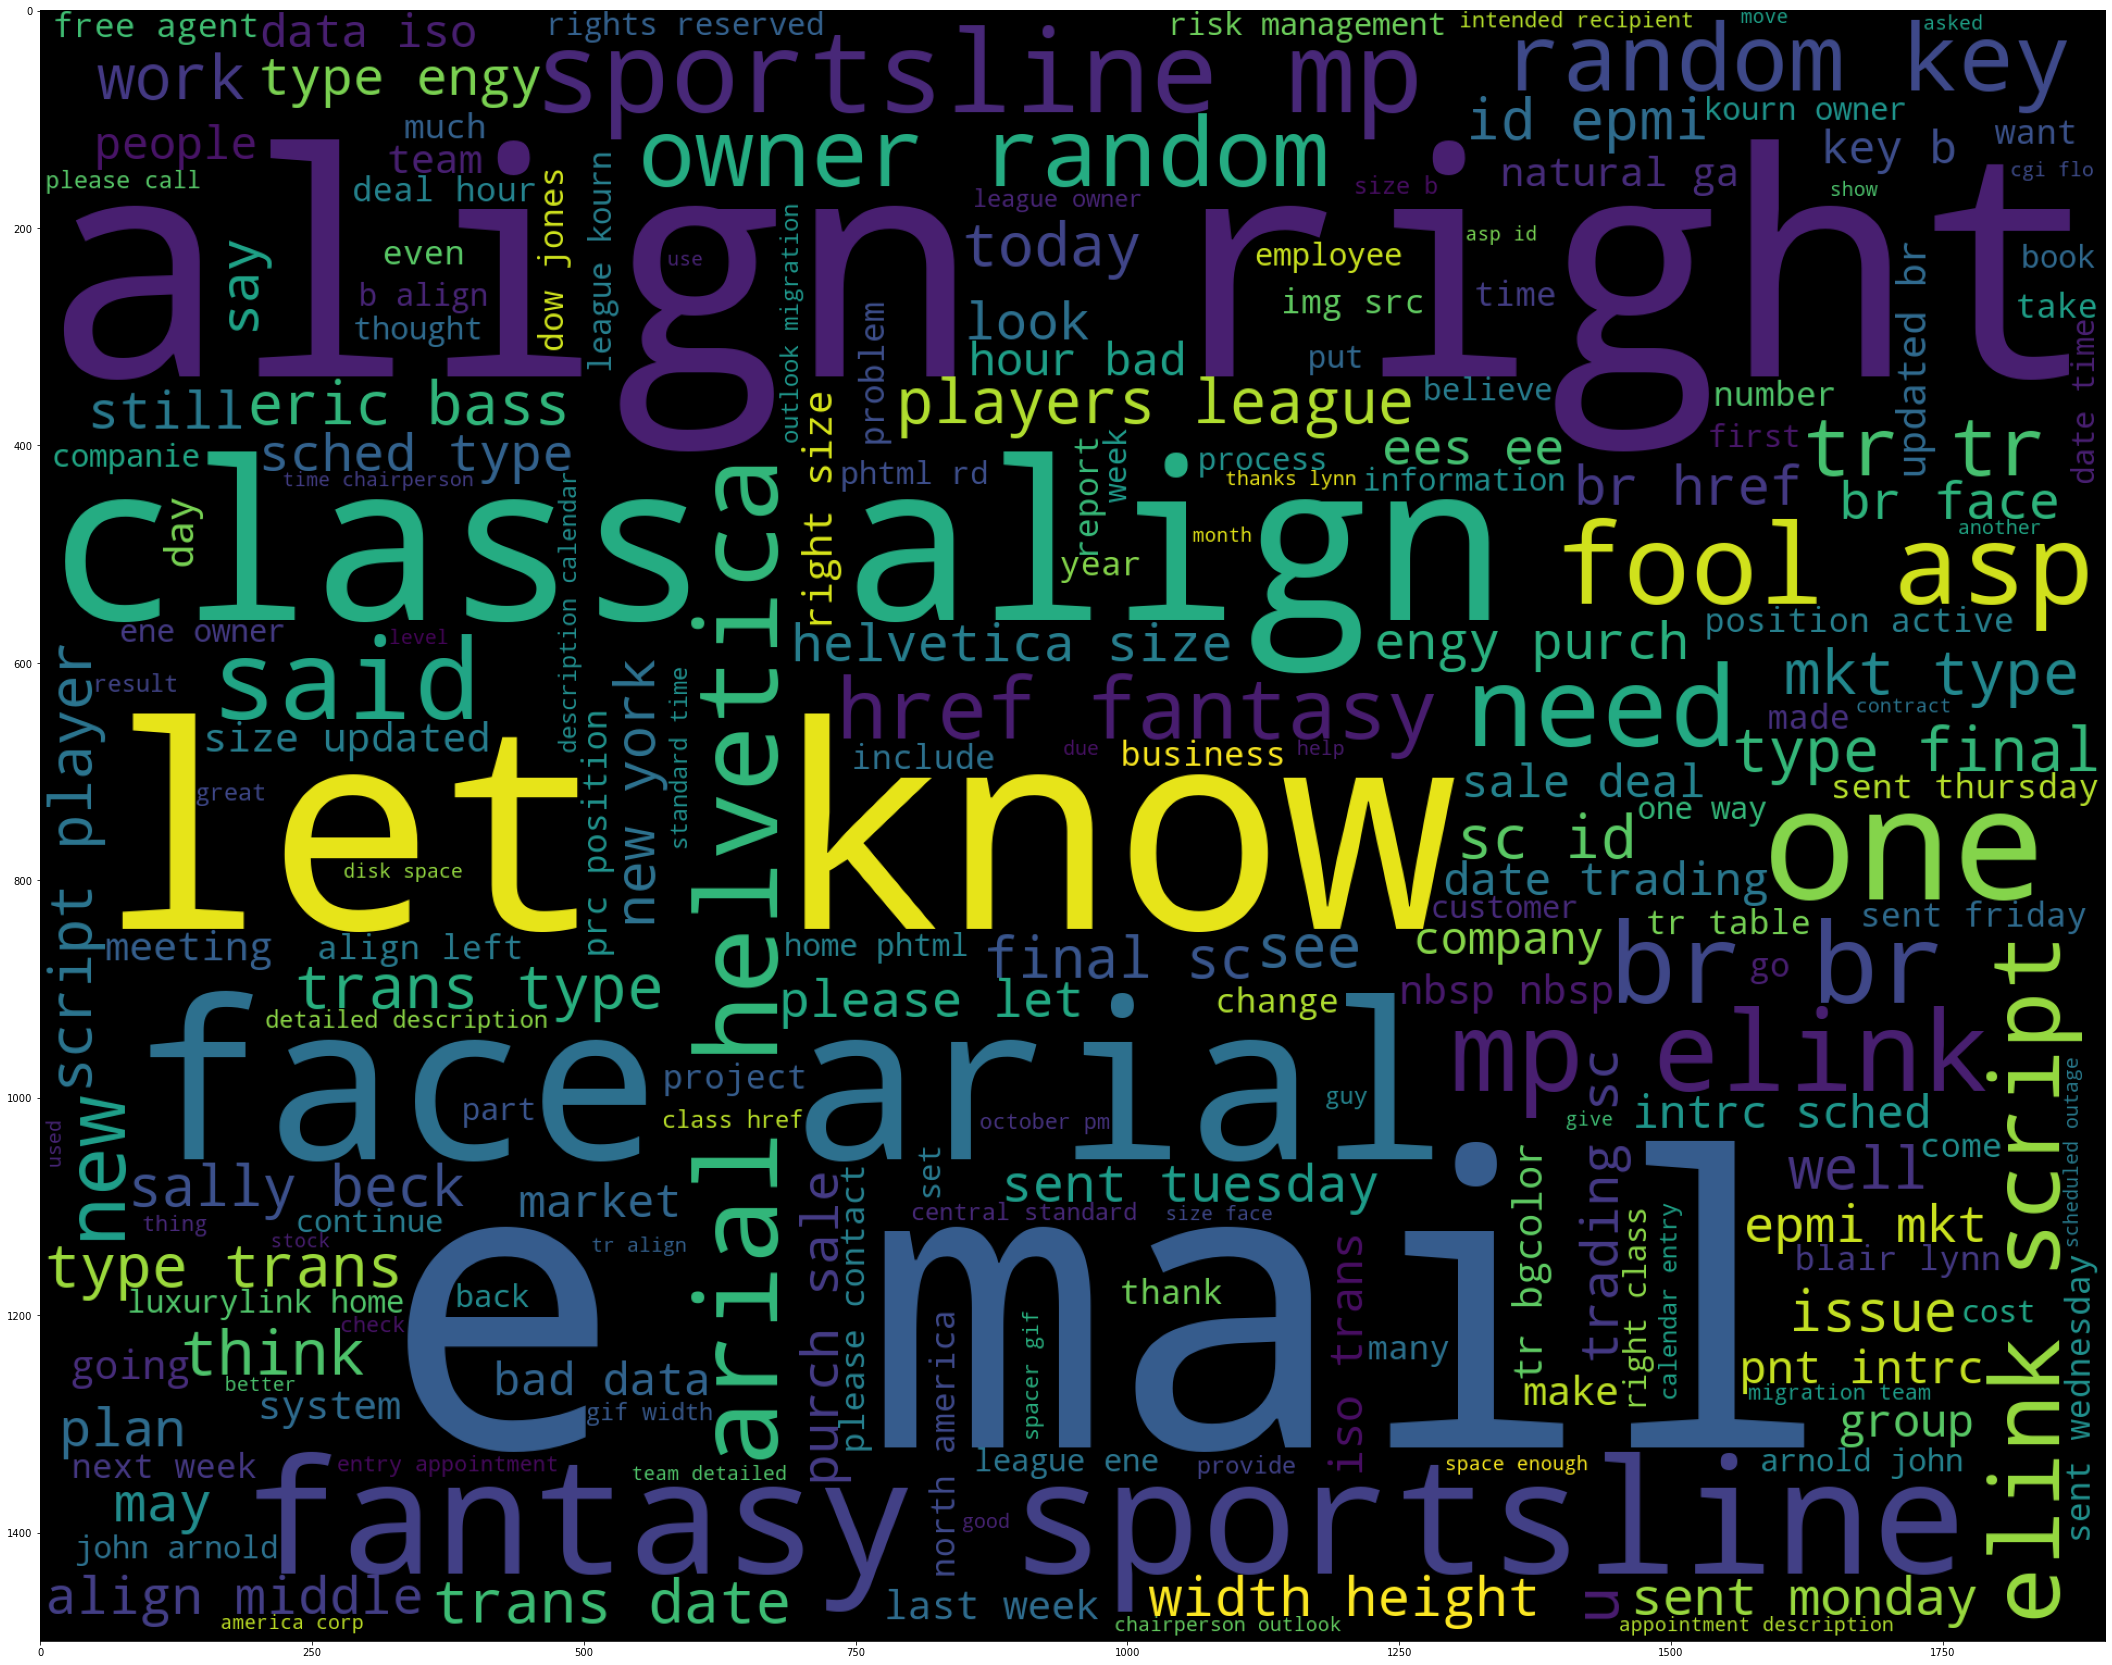

In [26]:
total_string=' '.join(email["content"])
wordcloud_email=WordCloud(background_color="black",width=1900,height=1500).generate(total_string)

plt.figure(figsize=(40,30))
plt.imshow(wordcloud_email)

In [27]:
email

,content,Class
0,eat shit john j lavorato pm john arnold footba...,Abusive
1,fuck,Abusive
2,gentlemen following champagne available approx...,Abusive
3,sorry taken long trying fend chicks life soooo...,Abusive
4,asshole john j lavorato john arnold john cant ...,Abusive
...,...,...
26419,need new leads business need increased interne...,Non Abusive
26420,garth brooks wrapped win tickets trip garth br...,Non Abusive
26421,dear smartreminders member franchoice free one...,Non Abusive
26422,kid rock forever official kid rock site kidroc...,Non Abusive


## BOW word count matrix

In [28]:
def split_into_words(i):
    return (i.split(' '))

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# preparing email texts into word count matrix format
e_bow=CountVectorizer(analyzer=split_into_words).fit(email["content"])

In [31]:
all_emails_cm=e_bow.transform(email["content"])
all_emails_cm.shape

(26424, 85984)

### TFIDF Tokenizer

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
tfidf=TfidfTransformer()
all_emails_tfidf=tfidf.fit_transform(all_emails_cm)
print(all_emails_tfidf.toarray)
all_emails_tfidf.shape

<bound method _cs_matrix.toarray of <26424x85984 sparse matrix of type '<class 'numpy.float64'>'
	with 2285751 stored elements in Compressed Sparse Row format>>


(26424, 85984)

## Label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
email["Class"]=le.fit_transform(email["Class"])

In [36]:
email["Class"]

0        0
1        0
2        0
3        0
4        0
        ..
26419    1
26420    1
26421    1
26422    1
26423    1
Name: Class, Length: 26424, dtype: int32

In [37]:
email["Class"].value_counts() # 1 : non abusive, 0: abusive

1    23014
0     3410
Name: Class, dtype: int64

## MODEL BUILDING

## Balancing Data

In [38]:
x=all_emails_tfidf
y=email["Class"]

### Balancing Data

In [39]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=0)

In [41]:
x_train.shape,y_train.shape

((20610, 85984), (20610,))

In [42]:
rus=RandomUnderSampler(random_state=42)
x_train_rus,y_train_rus=rus.fit_resample(x_train,y_train)

In [43]:
x_train_rus.shape,y_train_rus.shape

((5346, 85984), (5346,))

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [45]:
lr=LogisticRegression()
lr_model=lr.fit(x_train_rus,y_train_rus)

# Train
ylr_train_pred=lr_model.predict(x_train_rus)
# Result
lr_train_acc=accuracy_score(y_train_rus,ylr_train_pred)*100
print("Train Accuracy:",lr_train_acc)

# Test
ylr_test_pred=lr_model.predict(x_test)
#Result
lr_test_acc=accuracy_score(y_test,ylr_test_pred)*100
print("Test Accuracy:",lr_test_acc)

Train Accuracy: 98.65319865319864
Test Accuracy: 95.25283797729618


In [46]:
# Classification Report
print(classification_report(y_test,ylr_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       737
           1       1.00      0.95      0.97      5077

    accuracy                           0.95      5814
   macro avg       0.87      0.96      0.91      5814
weighted avg       0.96      0.95      0.96      5814



In [47]:
# Confusion matrix
confusion_matrix(y_test,ylr_test_pred)

array([[ 714,   23],
       [ 253, 4824]], dtype=int64)

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier(n_estimators=100,max_features=2,random_state=0)
rf_model=rf.fit(x_train_rus,y_train_rus)

#Train
yrf_train_pred=rf_model.predict(x_train_rus)*100
#Result
rf_train_acc=accuracy_score(y_train_rus,yrf_train_pred)
print("Train Accuracy:",rf_train_acc)

#Test
yrf_test_pred=rf_model.predict(x_test)
# Result
rf_test_acc=accuracy_score(y_test,yrf_test_pred)*100
print("Test Accuracy:",rf_test_acc)

Train Accuracy: 0.5
Test Accuracy: 96.30202958376333


In [50]:
# Classification report
print(classification_report(y_test,yrf_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       737
           1       0.99      0.97      0.98      5077

    accuracy                           0.96      5814
   macro avg       0.90      0.96      0.92      5814
weighted avg       0.97      0.96      0.96      5814



In [51]:
# confusion matrix
confusion_matrix(y_test,yrf_test_pred)

array([[ 696,   41],
       [ 174, 4903]], dtype=int64)

### Random Forest optimizing Technique

### XGBOOST Classification

In [52]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb_model=xgb.fit(x_train_rus,y_train_rus)

#Train
yxgb_train_pred=xgb_model.predict(x_train_rus)
#Result
xgb_train_acc=accuracy_score(y_train_rus,yxgb_train_pred)*100
print("Train Accuracy:",xgb_train_acc)

#Test
yxgb_test_pred=xgb_model.predict(x_test)
#Result
xgb_test_acc=accuracy_score(y_test,yxgb_test_pred)*100
print("Test Accuracy:",xgb_test_acc)

Train Accuracy: 98.31649831649831
Test Accuracy: 93.4812521499828


In [53]:
# Classification report
print(classification_report(y_test,yxgb_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79       737
           1       0.99      0.93      0.96      5077

    accuracy                           0.93      5814
   macro avg       0.83      0.95      0.88      5814
weighted avg       0.95      0.93      0.94      5814



In [54]:
# Confusion Matrix
confusion_matrix(y_test,yxgb_test_pred)

array([[ 712,   25],
       [ 354, 4723]], dtype=int64)

### ADA BOOST

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
adc=AdaBoostClassifier()
adc_model=adc.fit(x_train_rus,y_train_rus)

#Train
yadc_train_pred=adc_model.predict(x_train_rus)
#Result
adc_train_acc=accuracy_score(y_train_rus,yadc_train_pred)*100
print("Accuracy:",adc_train_acc)

#Test
yadc_test_pred=adc_model.predict(x_test)
#Result
adc_test_acc=accuracy_score(y_test,yadc_test_pred)*100
print("Accuracy:",adc_test_acc)

Accuracy: 89.74934530490086
Accuracy: 84.812521499828


In [57]:
# Classification_report
print(classification_report(y_test,yadc_test_pred))

              precision    recall  f1-score   support

           0       0.45      0.93      0.61       737
           1       0.99      0.84      0.91      5077

    accuracy                           0.85      5814
   macro avg       0.72      0.88      0.76      5814
weighted avg       0.92      0.85      0.87      5814



In [58]:
confusion_matrix(y_test,yadc_test_pred)

array([[ 687,   50],
       [ 833, 4244]], dtype=int64)

### SVM (Support Vector Machine) Classifier Algorithm

#### Optimizer : Linear

In [59]:
from sklearn.svm import SVC
svml=SVC(C=1.0,kernel="linear",gamma="auto")
svml_model=svml.fit(x_train_rus,y_train_rus)

#Train
ysvml_train_pred=svml_model.predict(x_train_rus)
#Result
svml_train_acc=accuracy_score(y_train_rus,ysvml_train_pred)*100
print("Train Accuracy:",svml_train_acc)

#Test
ysvml_test_pred=svml_model.predict(x_test)
#Result
svml_test_acc=accuracy_score(y_test,ysvml_test_pred)*100
print("Test Accuracy:",svml_test_acc)

Train Accuracy: 99.73812196034419
Test Accuracy: 96.95562435500516


In [60]:
# Classification_report
print(classification_report(y_test,ysvml_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       737
           1       1.00      0.97      0.98      5077

    accuracy                           0.97      5814
   macro avg       0.91      0.97      0.94      5814
weighted avg       0.97      0.97      0.97      5814



In [61]:
# Confusion matrix
confusion_matrix(y_test,ysvml_test_pred)

array([[ 720,   17],
       [ 160, 4917]], dtype=int64)

#### Optimizer: rbf

In [62]:
svmr=SVC(C=1.0,kernel="rbf",gamma="auto")
svmr_model=svmr.fit(x_train_rus,y_train_rus)

#Train
ysvmr_train_pred=svmr_model.predict(x_train_rus)
#result
svmr_train_acc=accuracy_score(y_train_rus,ysvmr_train_pred)*100
print("Accuracy",svmr_train_acc)

#Test
ysvmr_test_pred=svmr_model.predict(x_test)
#Result
svmr_test_acc=accuracy_score(y_test,ysvmr_test_pred)*100
print("Accuracy",svmr_test_acc)

Accuracy 88.43995510662177
Accuracy 94.27244582043343


In [63]:
# Classification report
print(classification_report(y_test,ysvmr_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       737
           1       0.97      0.96      0.97      5077

    accuracy                           0.94      5814
   macro avg       0.87      0.88      0.87      5814
weighted avg       0.94      0.94      0.94      5814



In [64]:
#confusion matrix
confusion_matrix(y_test,ysvmr_test_pred)

array([[ 590,  147],
       [ 186, 4891]], dtype=int64)

#### Optimizer : poly

In [65]:
svmp=SVC(C=1.0, kernel="poly", gamma="auto")
svmp_model=svmp.fit(x_train_rus,y_train_rus)

#Train
ysvmp_train_pred=svmp_model.predict(x_train_rus)
#Result
svmp_train_acc=accuracy_score(y_train_rus,ysvmp_train_pred)*100
print("Accuracy",svmp_train_acc)

#Test
ysvmp_test_pred=svmp_model.predict(x_test)
#Result
svmp_test_acc=accuracy_score(y_test,ysvmp_test_pred)*100
print("Accuracy",svmp_test_acc)

Accuracy 58.043396932285816
Accuracy 89.1640866873065


In [66]:
#classification_report
print(classification_report(y_test,ysvmp_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.15      0.26       737
           1       0.89      1.00      0.94      5077

    accuracy                           0.89      5814
   macro avg       0.93      0.57      0.60      5814
weighted avg       0.90      0.89      0.86      5814



In [67]:
# confusion_matrix
confusion_matrix(y_test,ysvmp_test_pred)

array([[ 111,  626],
       [   4, 5073]], dtype=int64)

#### Optimizer: sigmoid

In [68]:
svms=SVC(C=1.0, kernel= "sigmoid", gamma="auto")
svms_model=svms.fit(x_train_rus,y_train_rus)

# Train
ysvms_train_pred=svms_model.predict(x_train_rus)
#Result
svms_train_acc=accuracy_score(y_train_rus,ysvms_train_pred)*100
print("Accuracy:",svms_train_acc)

# Test
ysvms_test_pred=svms_model.predict(x_test)
#Result
svms_test_acc=accuracy_score(y_test,ysvms_test_pred)*100
print("Accuracy:",svms_test_acc)

Accuracy: 88.7018331462776
Accuracy: 94.22084623323013


In [69]:
# Classification report
print(classification_report(y_test,ysvms_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       737
           1       0.97      0.96      0.97      5077

    accuracy                           0.94      5814
   macro avg       0.86      0.88      0.87      5814
weighted avg       0.94      0.94      0.94      5814



In [70]:
# confusion_matrix
confusion_matrix(y_test,ysvms_test_pred)

array([[ 594,  143],
       [ 193, 4884]], dtype=int64)

### NAIVE BAYES

### Multinomial Naive Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb_model=mnb.fit(x_train_rus,y_train_rus)

#Train
ymnb_train_pred=mnb_model.predict(x_train_rus)
# Result
mnb_train_acc=accuracy_score(y_train_rus,ymnb_train_pred)*100
print("Train Accuracy:",mnb_train_acc)

# Test
ymnb_test_pred=mnb_model.predict(x_test)
# Result
mnb_test_acc=accuracy_score(y_test,ymnb_test_pred)*100
print("Test Accuracy:",mnb_test_acc)

Train Accuracy: 96.109240553685
Test Accuracy: 93.22325421396629


In [72]:
# Classification Report
print(classification_report(y_test,ymnb_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       737
           1       0.99      0.93      0.96      5077

    accuracy                           0.93      5814
   macro avg       0.83      0.94      0.87      5814
weighted avg       0.95      0.93      0.94      5814



In [73]:
# Confusion Matrix
confusion_matrix(y_test,ymnb_test_pred)

array([[ 692,   45],
       [ 349, 4728]], dtype=int64)

### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc_model=dtc.fit(x_train_rus,y_train_rus)

# Train 
ydtc_train_pred=dtc_model.predict(x_train_rus)
#Result
dtc_train_acc=accuracy_score(y_train_rus,ydtc_train_pred)*100
print("Train Accuracy:",dtc_train_acc)

# Test
ydtc_test_pred=dtc_model.predict(x_test)
#Result
dtc_test_acc=accuracy_score(y_test,ydtc_test_pred)*100
print("Test Accuracy:",dtc_test_acc)

Train Accuracy: 100.0
Test Accuracy: 88.35569315445476


In [75]:
# Classification report
print(classification_report(y_test,ydtc_test_pred))

              precision    recall  f1-score   support

           0       0.52      0.94      0.67       737
           1       0.99      0.88      0.93      5077

    accuracy                           0.88      5814
   macro avg       0.76      0.91      0.80      5814
weighted avg       0.93      0.88      0.90      5814



In [76]:
# Confusion Matrix
confusion_matrix(y_test,ydtc_test_pred)

array([[ 691,   46],
       [ 631, 4446]], dtype=int64)

### Optimizer: LightGBM

In [77]:
from lightgbm import LGBMClassifier

In [78]:
lgbm=LGBMClassifier()
lgbm_model=lgbm.fit(x_train_rus,y_train_rus)

# Train
ylgbm_train_pred=lgbm_model.predict(x_train_rus)
#Result
lgbm_train_acc=accuracy_score(y_train_rus,ylgbm_train_pred)*100
print("Accuracy:",lgbm_train_acc)

# Test
ylgbm_test_pred=lgbm_model.predict(x_test)
#Result
lgbm_test_acc=accuracy_score(y_test,ylgbm_test_pred)*100
print("Accuracy:",lgbm_test_acc)

Accuracy: 99.58847736625515
Accuracy: 95.85483316133471


In [79]:
# classification_report
print(classification_report(y_test,ylgbm_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       737
           1       0.99      0.96      0.98      5077

    accuracy                           0.96      5814
   macro avg       0.88      0.96      0.92      5814
weighted avg       0.97      0.96      0.96      5814



In [80]:
# confusion_matrix
confusion_matrix(y_test,ylgbm_test_pred)

array([[ 711,   26],
       [ 215, 4862]], dtype=int64)

### Neural Network 

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
from sklearn.model_selection import train_test_split

### Constructing a Sequential Neural network With

#### Input Neurons : 32 neurons

#### hidden layers : 10 neurons

#### output layers : 1 neurons

#### Optimizer : RMSprop

In [82]:
optimizer = RMSprop(0.001)#0.01 is a learning rate
neural = Sequential()
neural.add(Dense(12, input_dim=10, activation="relu"))
neural.add(Dense(50,activation='sigmoid'))
neural.add(Dense(1,activation="sigmoid"))

In [83]:
neural.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["acc"])

#### Model fitting

In [84]:
seed_val=47
import tensorflow
import random 
random.seed(seed_val)
tensorflow.random.set_seed(seed_val)

In [85]:
nn_model=neural.fit(x_train_rus,y_train_rus,epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\91854\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\91854\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\91854\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\91854\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\91854\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\91854\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 85984)


## Final model Table

In [86]:
final_table=pd.DataFrame({"Models":["Logistic regression","Random Forest","XGBOOST","ADABOOST","SVM Linear","SVM rbf","SVM poly","SVM sigmoid","Naive Bayes","Decision Tree","LightGBM"],
                         "Train Accuracy":[lr_train_acc, rf_train_acc, xgb_train_acc,adc_train_acc,svml_train_acc,svmr_train_acc,svmp_train_acc,svms_train_acc, mnb_train_acc, dtc_train_acc,lgbm_train_acc],
                         "Test Accuracy":[lr_test_acc, rf_test_acc, xgb_test_acc,adc_test_acc,svml_test_acc,svmr_test_acc,svmp_test_acc,svms_test_acc,mnb_test_acc, dtc_test_acc,lgbm_test_acc]})

final_table

,Models,Train Accuracy,Test Accuracy
0,Logistic regression,98.653199,95.252838
1,Random Forest,0.500000,96.302030
2,XGBOOST,98.316498,93.481252
3,ADABOOST,89.749345,84.812521
4,SVM Linear,99.738122,96.955624
5,SVM rbf,88.439955,94.272446
6,SVM poly,58.043397,89.164087
7,SVM sigmoid,88.701833,94.220846
8,Naive Bayes,96.109241,93.223254
9,Decision Tree,100.000000,88.355693
